In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('./train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #null 값 점검

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

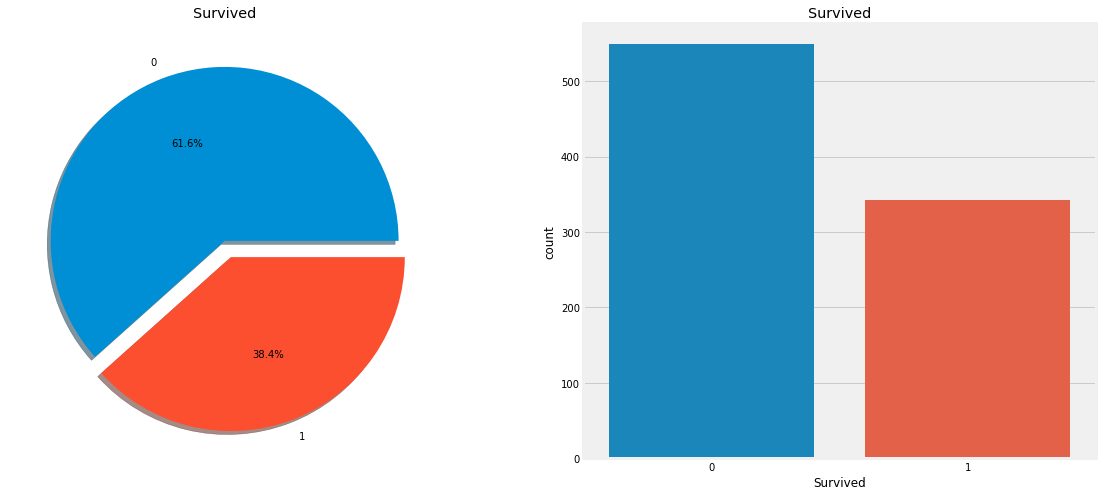

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

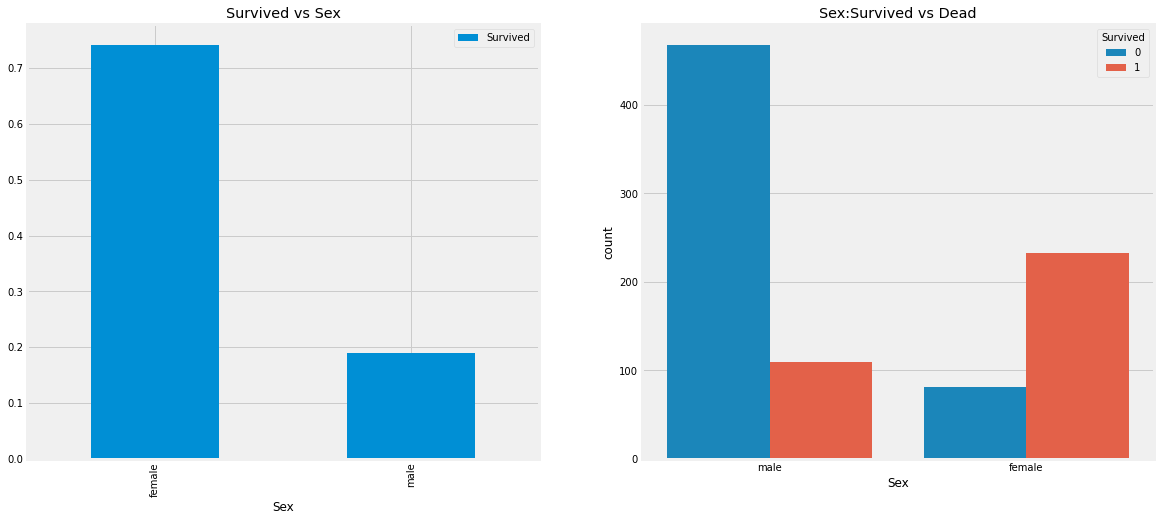

In [7]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


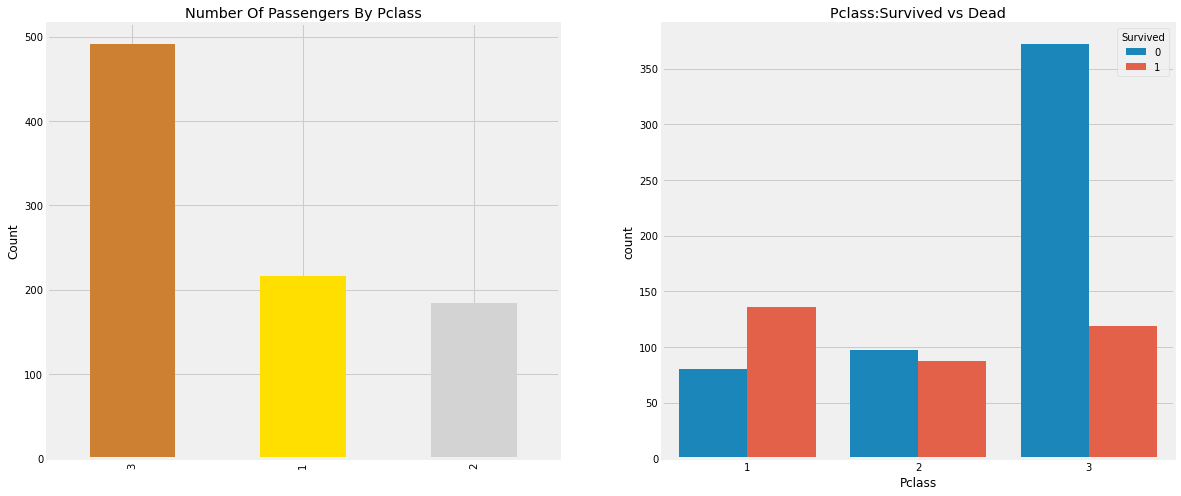

In [9]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

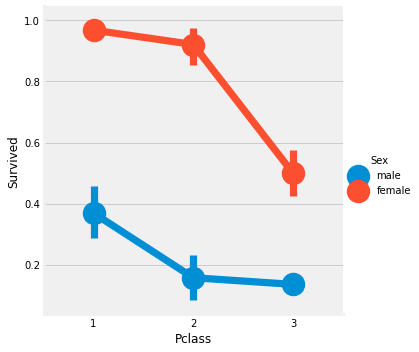

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


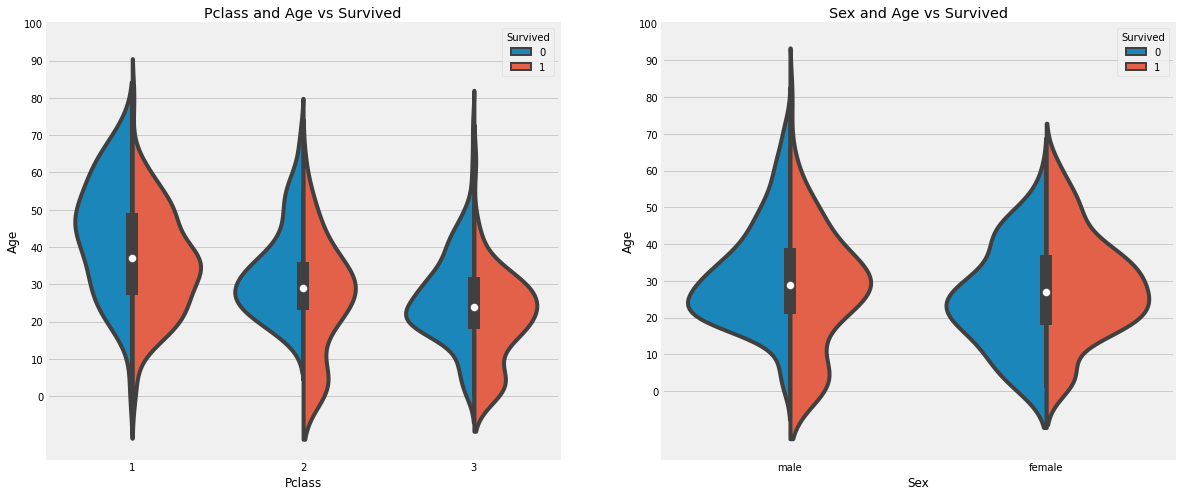

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #결측값 더 없는지 확인

False

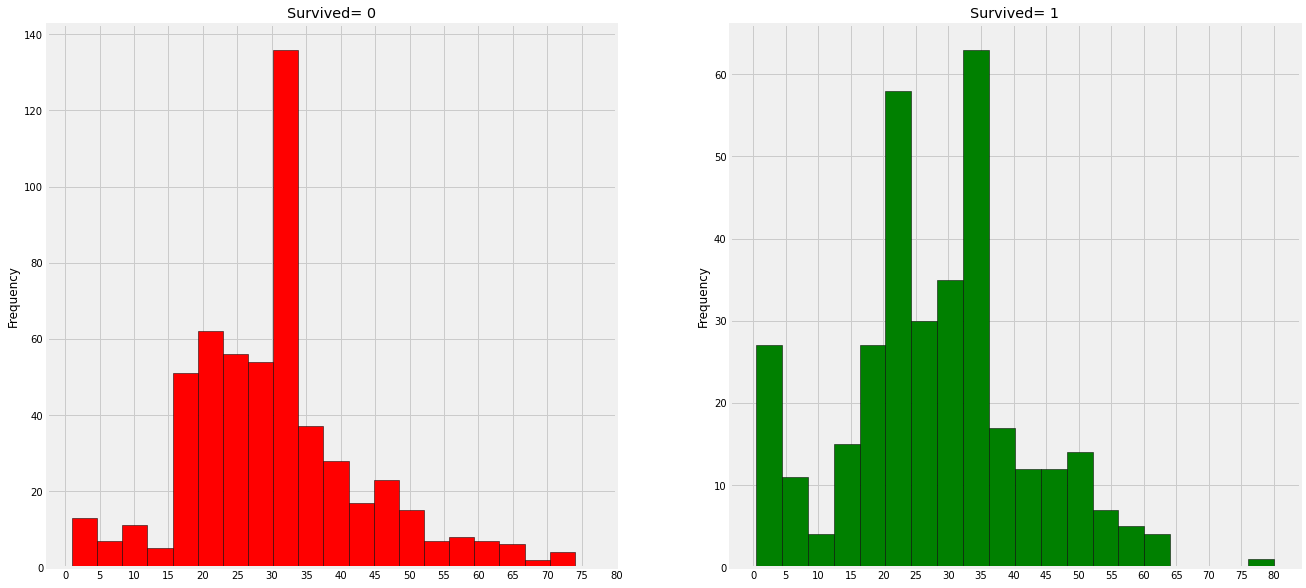

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

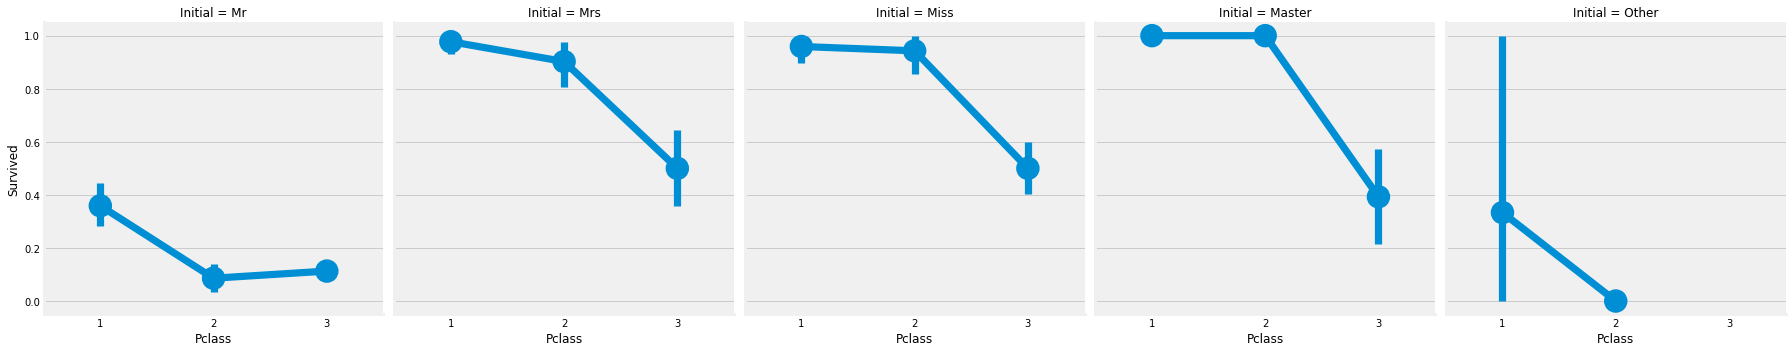

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

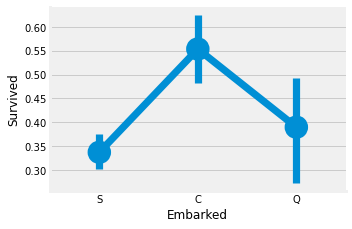

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

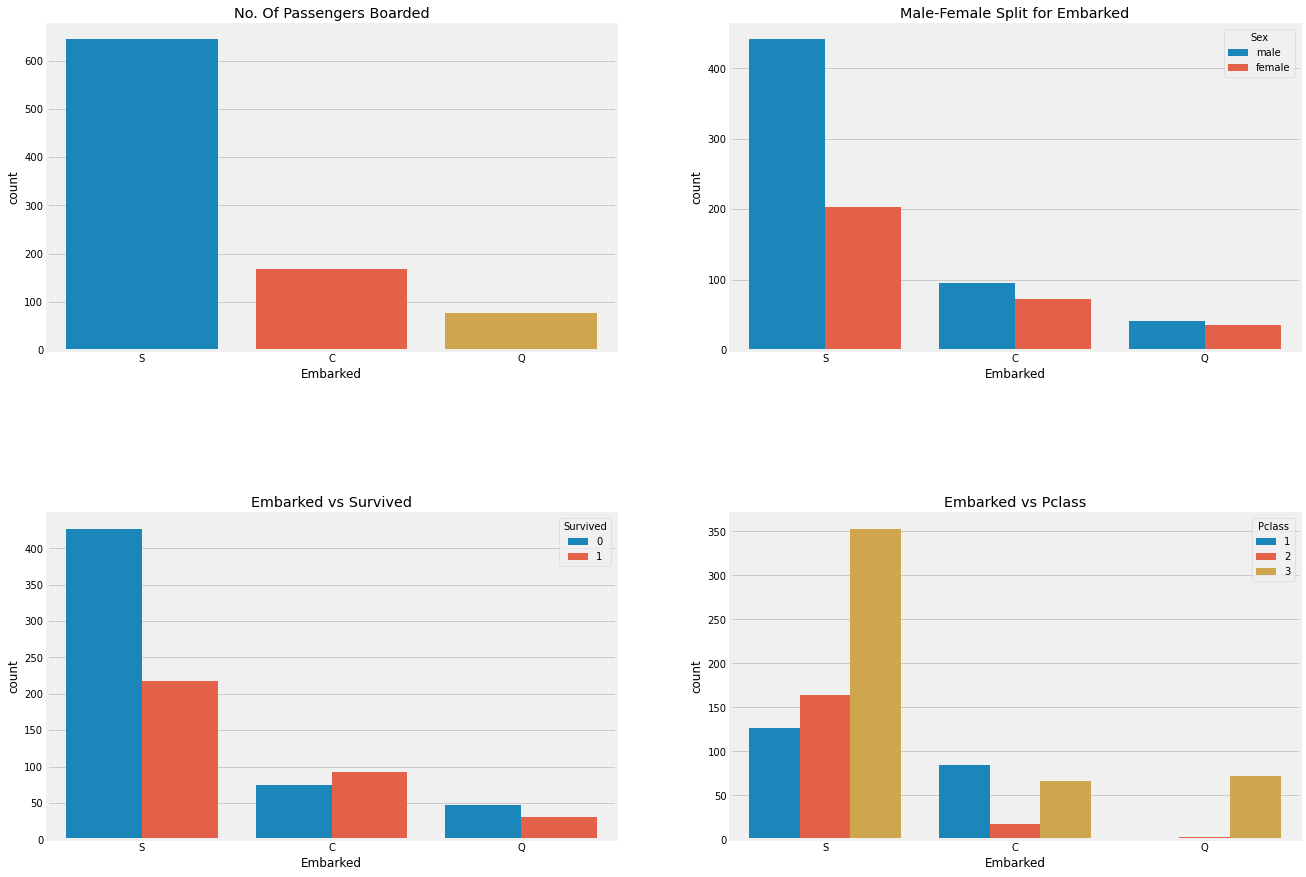

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

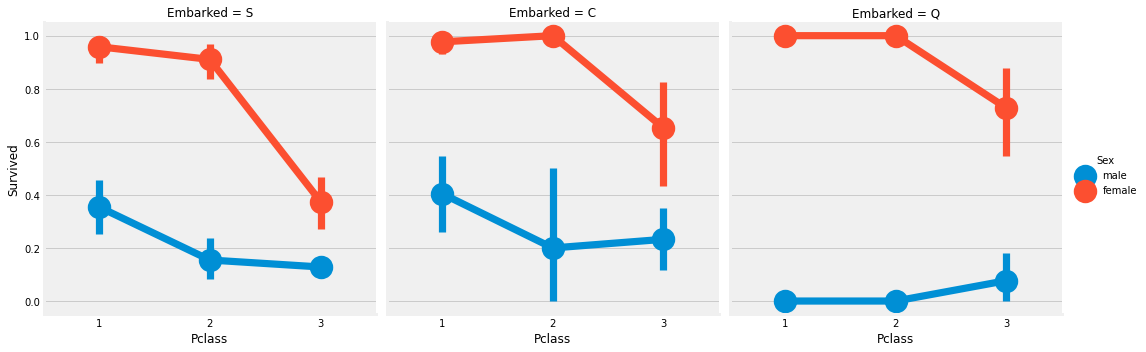

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()

False

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


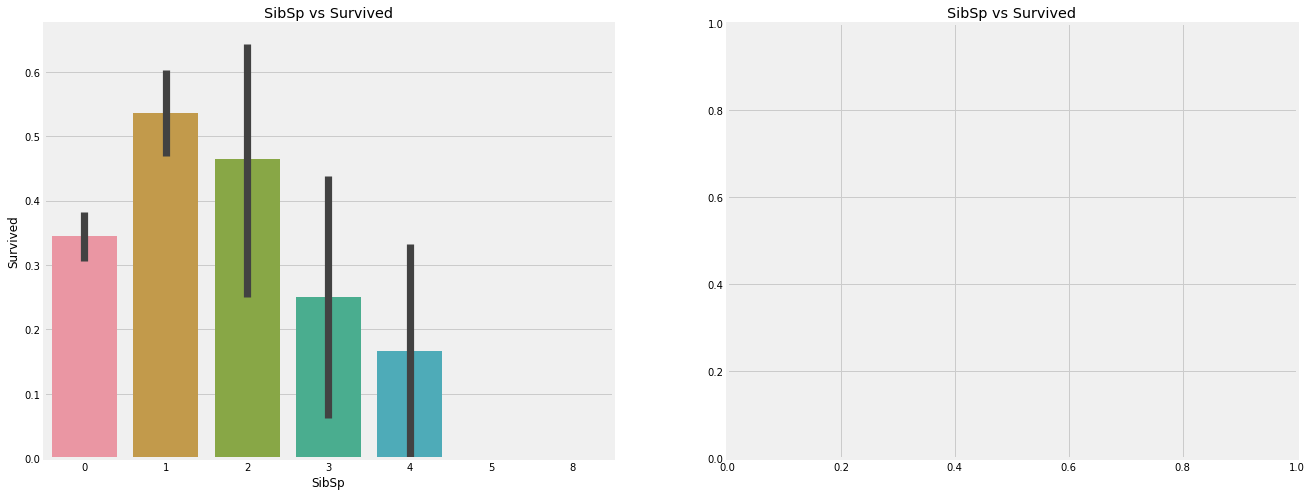

In [29]:
f, ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


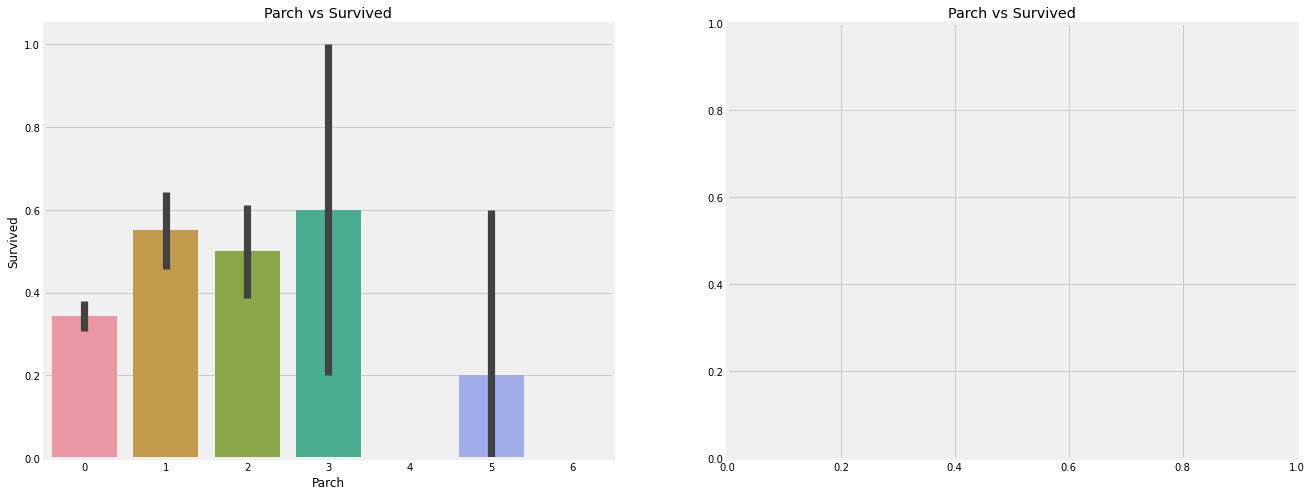

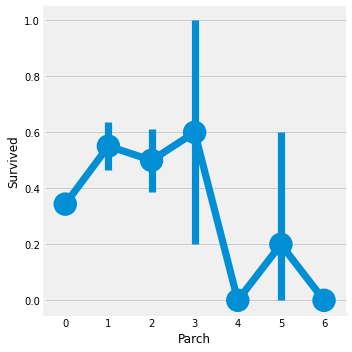

In [32]:
f, ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

parch 변수는 parent+child 인데 설명은 child 제외하고 parent 만 고려한 것 같음
child도 포함된 변수이기 때문에 애들 수가 많은 부모는 자기 목숨 대신 애들 먼저 살리니까(women and children first? 그런 말도 있고요) parch 가 일정 수준 이상 높을수록 생존률 낮아지는 거 설명할 수 있다고 생각했음

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


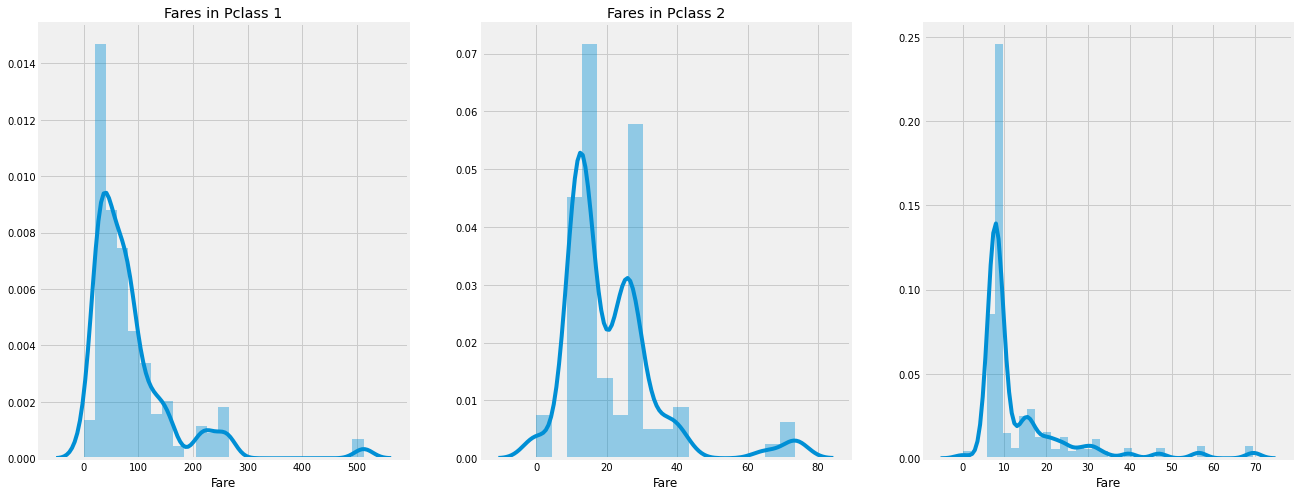

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
plt.show()

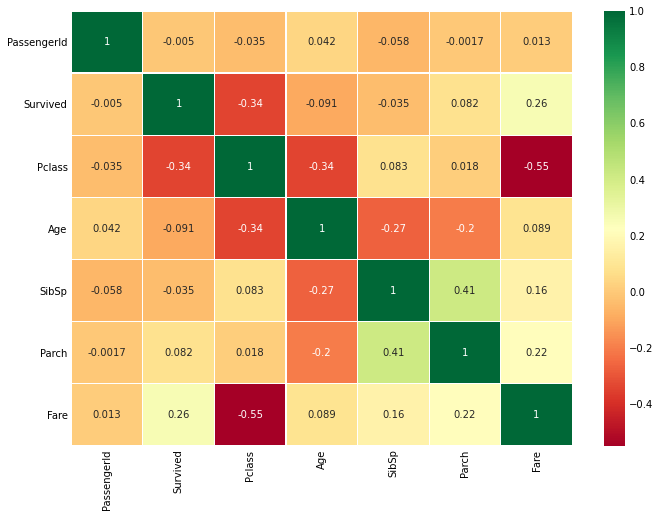

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


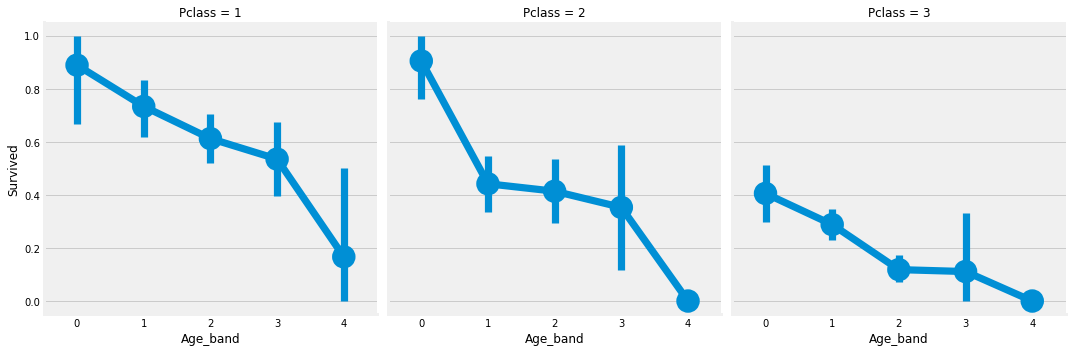

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

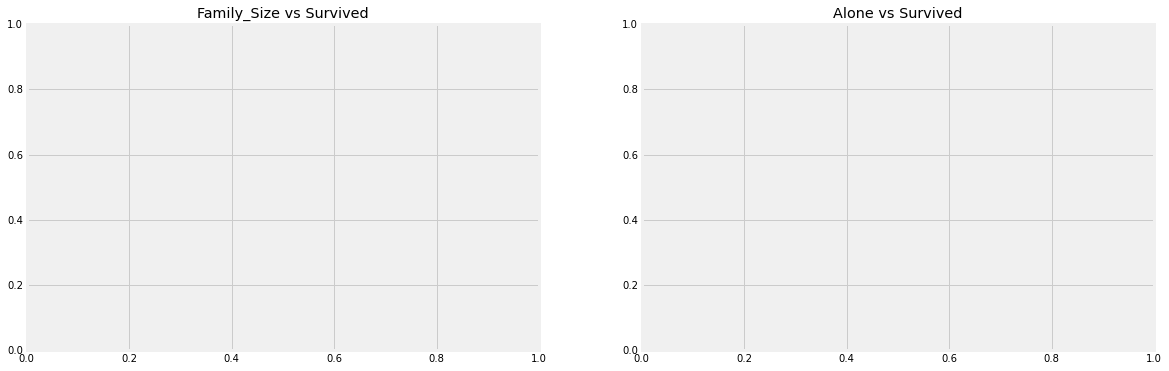

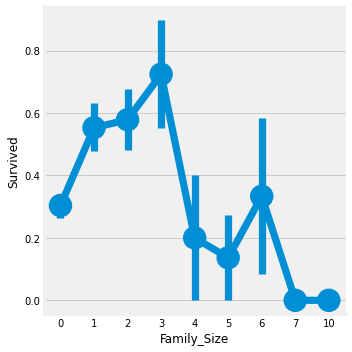

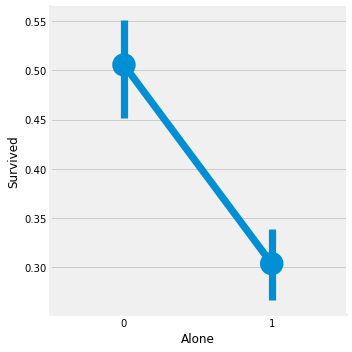

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

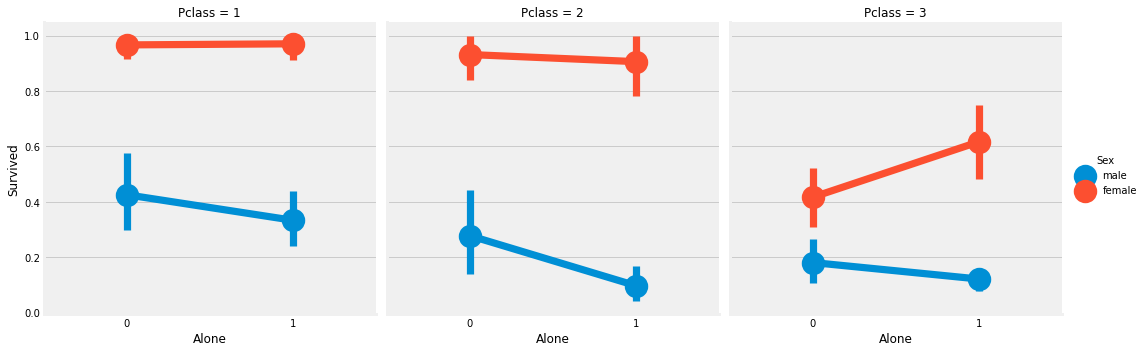

In [40]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3


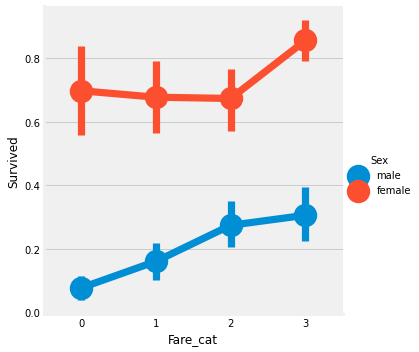

In [43]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

여성은 fare_cat이 0~2로 커지면서 약간 생존률이 감소하는 것 같기도(혹은 그대로이던지)

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

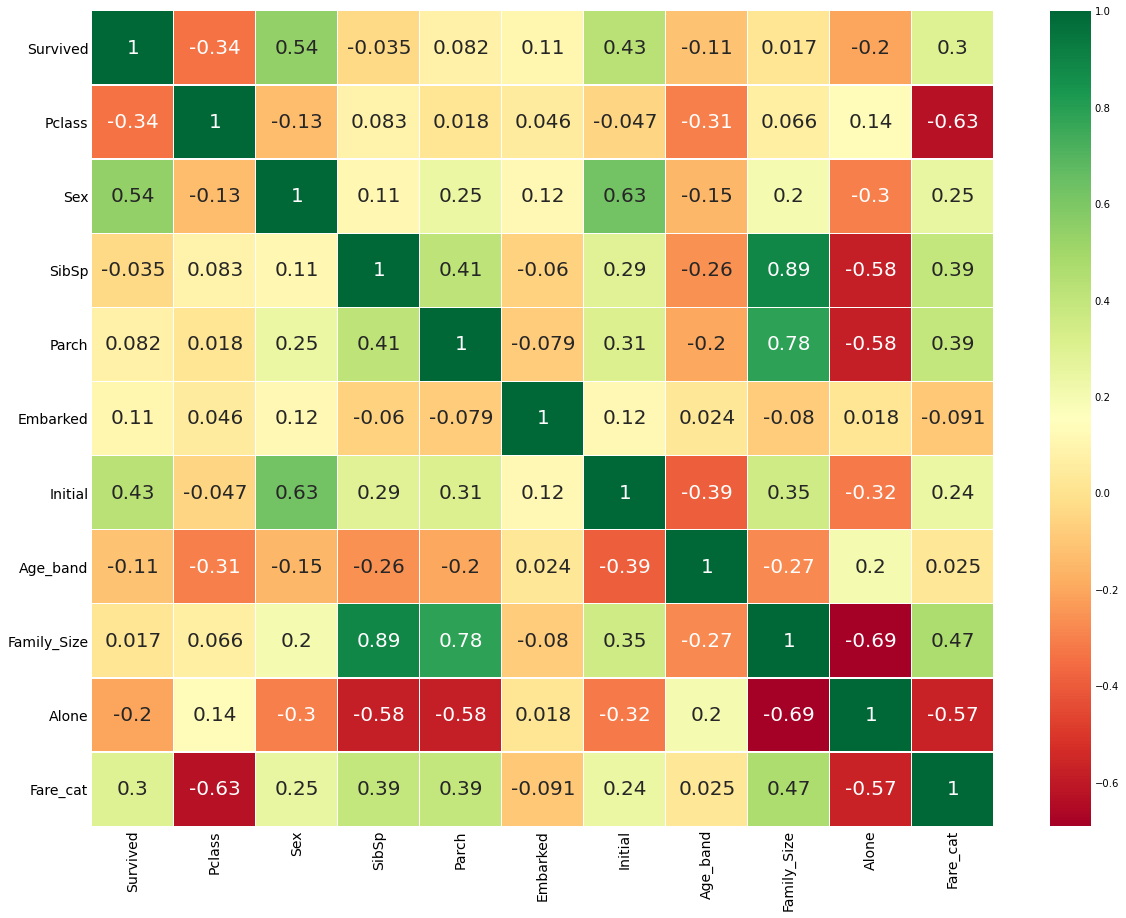

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

각 모델의 정확도를 평가하는 코드(교재에 있는 코드)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    #roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))

In [47]:
#라이브러리 호출
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [48]:
#훈련/테스트 데이터 분리
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 랜덤 포레스트 하이퍼 파라미터 튜닝 및 시각화

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:

params={'n_estimators':[100,200,300],'max_depth':[6,8,10,12,16,20,24],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=5,n_jobs=-1)
grid_cv.fit(train_X, train_Y)

print('RandomForestClassifier 기본 하이퍼 파라미터:\n', rf_clf.get_params())

print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

RandomForestClassifier 기본 하이퍼 파라미터:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
최적의 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.8202


In [51]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_leaf','param_min_samples_split','param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,6,8,8,100,0.815406
1,6,8,8,200,0.813819
2,6,8,8,300,0.812219
3,6,8,16,100,0.815406
4,6,8,16,200,0.813819
...,...,...,...,...,...
184,24,18,16,200,0.813806
185,24,18,16,300,0.812206
186,24,18,20,100,0.813806
187,24,18,20,200,0.813806


In [52]:
model=RandomForestClassifier(n_estimators=100, max_depth=6,min_samples_leaf=12,min_samples_split=8)
model.fit(train_X,train_Y)
prediction10=model.predict(test_X)
get_clf_eval(test_Y, prediction10)

오차 행렬
[[154  11]
 [ 30  73]]
정확도: 0.8470, 정밀도: 0.8690, 재현율: 0.7087, F1:0.7807


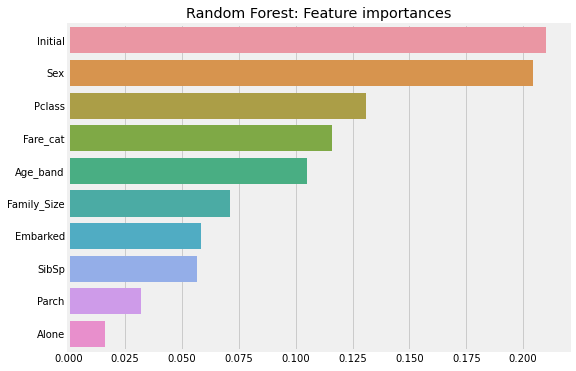

In [53]:
#랜덤 포레스트 피쳐 시각화
rf_clf.fit(train_X, train_Y)
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns )
ftr=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Random Forest: Feature importances')
sns.barplot(x=ftr,y=ftr.index)
plt.show()

## LightGBM

In [54]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(test_X, test_Y)]
lgbm_wrapper.fit(train_X, train_Y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose= True)
preds =  lgbm_wrapper.predict_proba(test_X)
pred_proba = lgbm_wrapper.predict_proba(test_X)[:,1]

[1]	valid_0's binary_logloss: 0.620174
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.583364
[3]	valid_0's binary_logloss: 0.553125
[4]	valid_0's binary_logloss: 0.527868
[5]	valid_0's binary_logloss: 0.509184
[6]	valid_0's binary_logloss: 0.492304
[7]	valid_0's binary_logloss: 0.47873
[8]	valid_0's binary_logloss: 0.467414
[9]	valid_0's binary_logloss: 0.455988
[10]	valid_0's binary_logloss: 0.445489
[11]	valid_0's binary_logloss: 0.436049
[12]	valid_0's binary_logloss: 0.428265
[13]	valid_0's binary_logloss: 0.421475
[14]	valid_0's binary_logloss: 0.416425
[15]	valid_0's binary_logloss: 0.41282
[16]	valid_0's binary_logloss: 0.409873
[17]	valid_0's binary_logloss: 0.4065
[18]	valid_0's binary_logloss: 0.404963
[19]	valid_0's binary_logloss: 0.402636
[20]	valid_0's binary_logloss: 0.401159
[21]	valid_0's binary_logloss: 0.400135
[22]	valid_0's binary_logloss: 0.398638
[23]	valid_0's binary_logloss: 0.397954
[24]	valid_0's binary_logloss: 

In [55]:
lgbm_roc_score = roc_auc_score(test_Y,lgbm_wrapper.predict_proba(test_X)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8843


In [56]:
#하이퍼파라미터 튜닝

In [57]:
print('LGBM 기본 하이퍼 파라미터:\n', lgbm_wrapper.get_params())

LGBM 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [58]:
lgbm_clf=LGBMClassifier(n_estimators=200) #수행시간 줄이기 위해 n_estimator 줄임
params={'num_leaves':[32,64],'max_depth':[6,8,10,12,16,20,24]}


grid_cv=GridSearchCV(lgbm_clf,param_grid=params,cv=5)
grid_cv.fit(train_X, train_Y)

print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)

print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터:
 {'max_depth': 12, 'num_leaves': 32}
최고 예측 정확도:0.8122


In [59]:
lgbm_clf=LGBMClassifier(n_estimators=200,num_leaves=12,max_depth=32)
evals=[(test_X,test_Y)]
lgbm_clf.fit(train_X, train_Y, early_stopping_rounds=100,eval_metric='auc',eval_set=evals,verbose=True)



[1]	valid_0's auc: 0.871403	valid_0's binary_logloss: 0.62056
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.872404	valid_0's binary_logloss: 0.583866
[3]	valid_0's auc: 0.873639	valid_0's binary_logloss: 0.553919
[4]	valid_0's auc: 0.86852	valid_0's binary_logloss: 0.531859
[5]	valid_0's auc: 0.870815	valid_0's binary_logloss: 0.510761
[6]	valid_0's auc: 0.873051	valid_0's binary_logloss: 0.494549
[7]	valid_0's auc: 0.873963	valid_0's binary_logloss: 0.480779
[8]	valid_0's auc: 0.874492	valid_0's binary_logloss: 0.469712
[9]	valid_0's auc: 0.87717	valid_0's binary_logloss: 0.458103
[10]	valid_0's auc: 0.878405	valid_0's binary_logloss: 0.447545
[11]	valid_0's auc: 0.879818	valid_0's binary_logloss: 0.439043
[12]	valid_0's auc: 0.8807	valid_0's binary_logloss: 0.431281
[13]	valid_0's auc: 0.881112	valid_0's binary_logloss: 0.425074
[14]	valid_0's auc: 0.880847	valid_0's binary_logloss: 0.420164
[15]	valid_0's auc: 0.878758	valid_0's binary_logloss: 0

LGBMClassifier(max_depth=32, n_estimators=200, num_leaves=12)

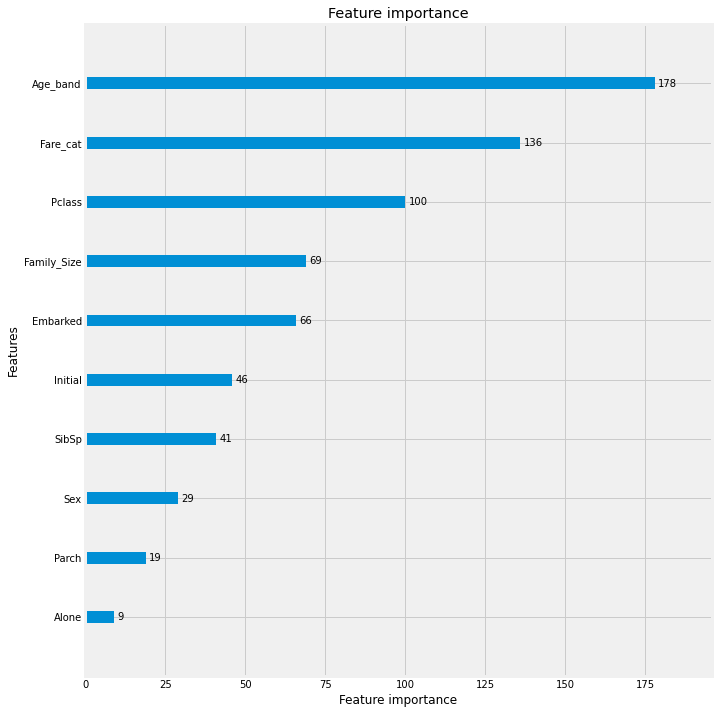

In [60]:
#LightGBM 피쳐 시각화
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

age_band가 가장 중요, fare_cat, Pclass가 그 다음.
Initial과 Sex는 중요도가 높게 나오지 않음!